In [1]:
import sys
sys.path.append('..')

In [2]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [3]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

In [4]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [5]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [6]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [7]:
from scratch.statistics import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

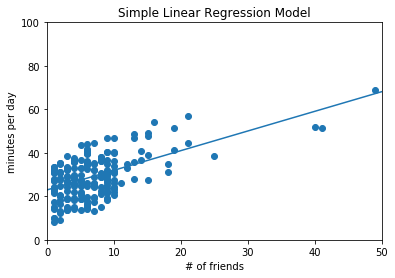

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1)
ax.scatter(num_friends_good,daily_minutes_good);
ax.plot([0,50],[alpha,alpha+beta*50])
ax.set_xlim(0,50);ax.set_ylim(0,100);
ax.set_xlabel('# of friends');ax.set_ylabel('minutes per day')
ax.set_title('Simple Linear Regression Model');

In [9]:
from scratch.statistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

In [10]:
import random
import tqdm
from scratch.gradient_descent import gradient_step

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]  # choose random value to start

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(num_friends_good,
                                         daily_minutes_good))

        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(num_friends_good,
                                         daily_minutes_good))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,
                               num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")

        # Finally, update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

loss: 13196.619: 100%|██████████| 10000/10000 [00:14<00:00, 687.24it/s]
